<a href="https://colab.research.google.com/github/Boom-Ba/DataSciene/blob/main/911calls_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **911 Calls Project:**

---


1.   Spatial Info: lat, lng of occurences
2.   Description: description states in the emergency calls
3.   Zip: Zip code
4.   Title
5.   TimeStamp
6.   Township
7.   Addr
8.   Dummpy Variable (always as 1)

**The main objective is to find out what caused an emergency happaning, and what things we can build up to decrese number of emergencies from the historical data exploration, number of frequency based on the time**

## Library **Import**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv('/content/911.csv')

In [14]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
#the most frequent zipcode of occurences
df['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [9]:
#the most frequent township 
df['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [13]:
print(len(df['title'].unique())) #convert into an array

131


In [11]:
df['title'].nunique() #output num of uniques 

131

# Creating New Features: what caused emergency happening



In [24]:
# in title
x=df['title'][0]
print(x)

EMS: BACK PAINS/INJURY


In [25]:
x.split(':')[0]

'EMS'

In [26]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

In [27]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [28]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
289235        EMS
289236       Fire
289237    Traffic
289238    Traffic
289239    Traffic
Name: Reason, Length: 289240, dtype: object

In [29]:
#What is the top reasons caused emergency

In [30]:
df['Reason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: Reason, dtype: int64

In [31]:
#Draw countplot for 'Reason'
# Notice, for countplot, there is no y input because it assumed the y is count of x

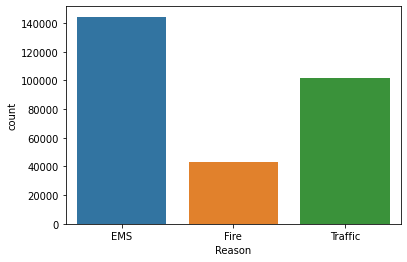

In [32]:
sns.countplot(x='Reason',data=df, palette='viridis')

# Timestamp

In [34]:
df.info() 
#timestamp has been coded as an obj

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
 9   Reason     289240 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 22.1+ MB


In [37]:
type(df['timeStamp'].iloc[0])

str

In [39]:
#cast to a timestamp obj in df
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [41]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

# Adding Attributes from timeStamp Col

In [45]:
time=df['timeStamp'][0]

In [54]:
time.date

<function Timestamp.date>

In [50]:
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)

In [51]:
df['Month']=df['timeStamp'].apply(lambda time: time.month)

In [62]:
df=df.drop(['Date'],axis=1)

In [63]:
df['Day of Week']=df['timeStamp'].apply(lambda time: time.dayofweek)

In [64]:
df['Day of Week']

0         3
1         3
2         3
3         3
4         3
         ..
289235    5
289236    5
289237    5
289238    5
289239    5
Name: Day of Week, Length: 289240, dtype: int64

In [65]:
date_map ={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [67]:
#Map num into string of day_of_week
df['Day of Week']=df['Day of Week'].map(date_map)

In [68]:
df['Day of Week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
289235    Sat
289236    Sat
289237    Sat
289238    Sat
289239    Sat
Name: Day of Week, Length: 289240, dtype: object

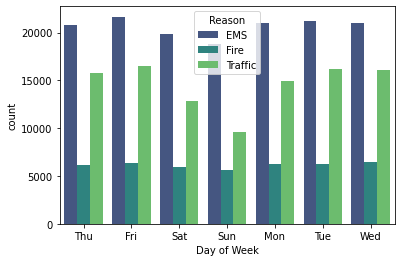

In [71]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

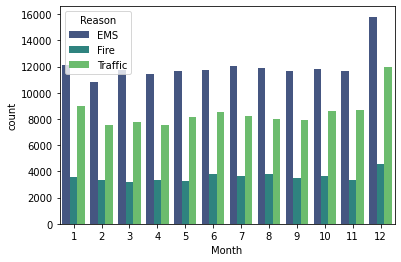

In [72]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

In [73]:
groupby_month=df.groupby('Month').count()

In [74]:
groupby_month.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


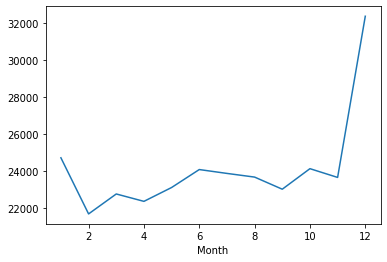

In [77]:
groupby_month['lat'].plot()

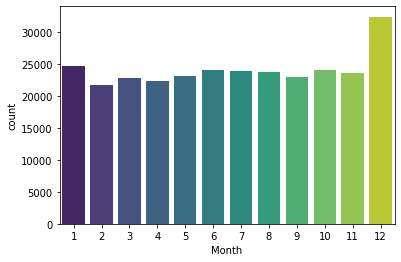

In [78]:
sns.countplot(x='Month',data=df,palette='viridis')

In [79]:
groupby_month.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
1,2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
2,3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
3,4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
4,5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093
5,6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,24065
6,7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,23856
7,8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,23657
8,9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,23001
9,10,24113,24113,24113,20931,24113,24113,24109,24113,24113,24113,24113,24113


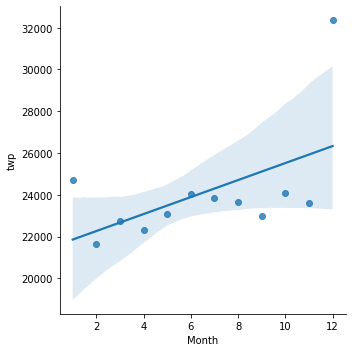

In [81]:
#linear file on number of emergency calls per month
sns.lmplot(x='Month',y='twp',data=groupby_month.reset_index())

In [82]:
#create Date from timeStamp
t=df['timeStamp'].iloc[0]

In [83]:
t

Timestamp('2015-12-10 17:10:52')

In [85]:
t.date()

datetime.date(2015, 12, 10)

In [86]:
df['Date']=df['timeStamp'].apply(lambda time: time.date())

In [87]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
289235    2017-12-30
289236    2017-12-30
289237    2017-12-30
289238    2017-12-30
289239    2017-12-30
Name: Date, Length: 289240, dtype: object

In [92]:
groupby_date=df.groupby('Date').count()

In [93]:
groupby_date

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-26,373,373,373,316,373,373,373,373,373,373,373,373,373
2017-12-27,387,387,387,332,387,387,387,387,387,387,387,387,387
2017-12-28,352,352,352,324,352,352,352,352,352,352,352,352,352


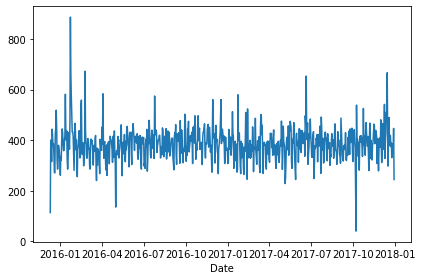

In [95]:
groupby_date['lat'].plot()
plt.tight_layout() #fix the x-axis

In [96]:
groupby_date['reason']=df['Reason']

In [98]:
groupby_date

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,reason
Date,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,NaN
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,NaN
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,NaN
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316,NaN
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-26,373,373,373,316,373,373,373,373,373,373,373,373,373,NaN
2017-12-27,387,387,387,332,387,387,387,387,387,387,387,387,387,NaN
2017-12-28,352,352,352,324,352,352,352,352,352,352,352,352,352,NaN


Text(0.5, 1.0, 'Traffic')

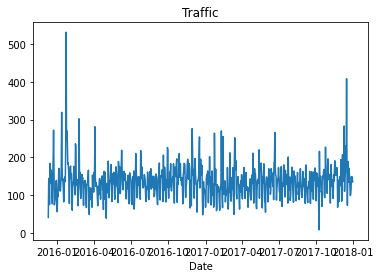

In [106]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

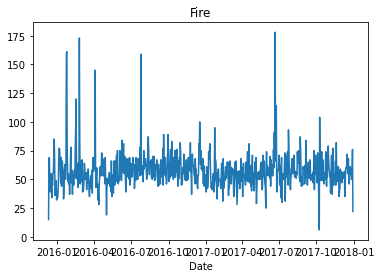

In [109]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

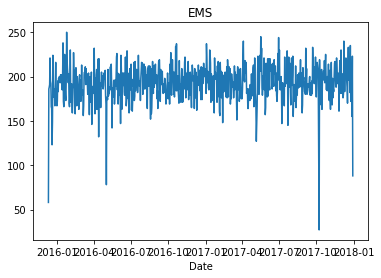

In [110]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')

# Unstack
heatmap 

In [116]:
groupby_day_hour=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

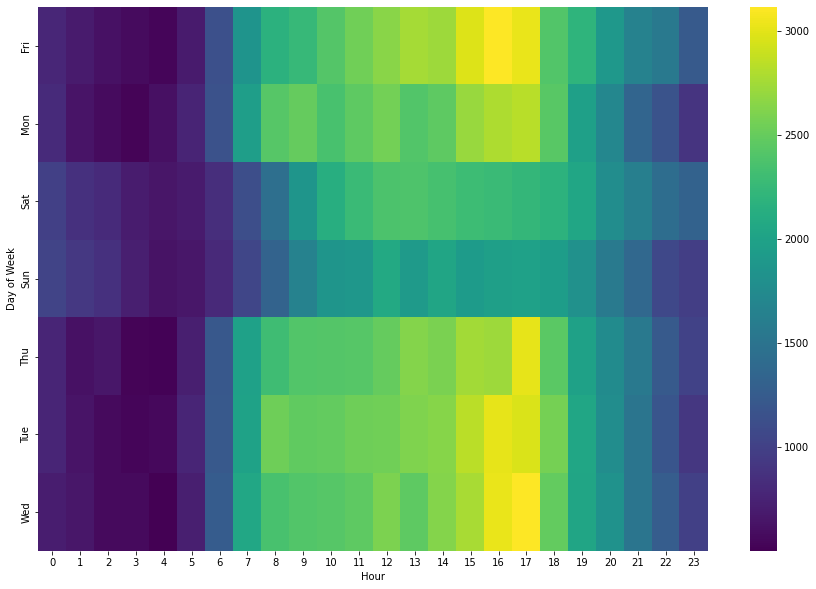

In [123]:
plt.figure(figsize=(15,10))
sns.heatmap(groupby_day_hour,cmap='viridis')

<Figure size 1440x1080 with 0 Axes>

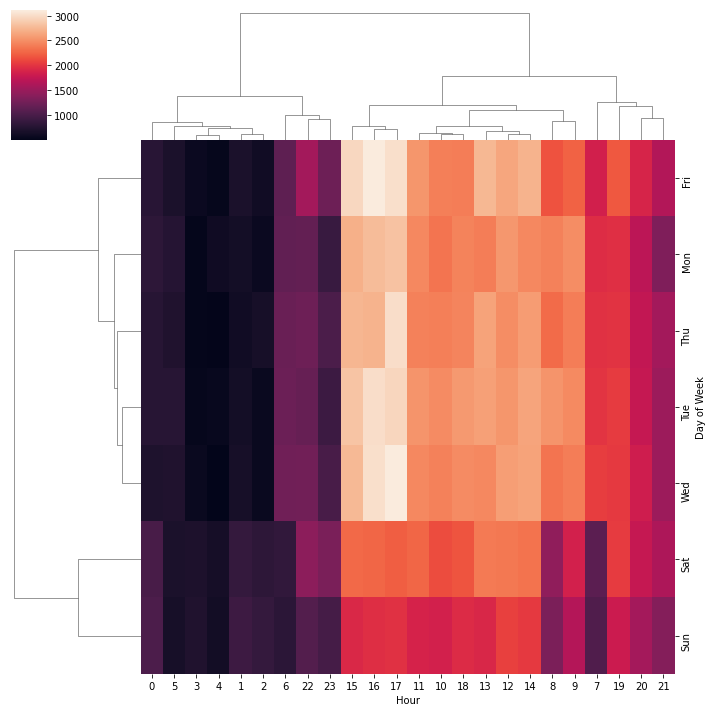

In [125]:
plt.figure(figsize=(20,15))
sns.clustermap(groupby_day_hour)

In [126]:
mask=np.zeros_like(df.corr())

In [128]:
triangle_indices=np.triu_indices_from(mask)

In [129]:
triangle_indices

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5]))

In [130]:
mask[triangle_indices] = True

In [131]:
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [132]:
plt.figure(figsize=(16,10))

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

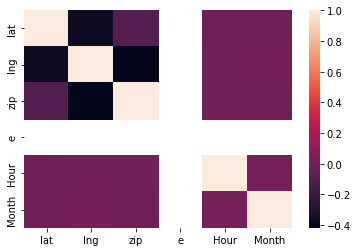

In [133]:
sns.heatmap(df.corr())